In [3]:
import pandas as pd

customers = pd.read_csv('/content/drive/MyDrive/Zeotap/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Zeotap/Transactions.csv')

In [4]:
data = pd.merge(customers, transactions, on='CustomerID', how='left')

In [7]:
from datetime import datetime

# Assuming 'TransactionDate' and 'SignupDate' are in datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['SignupDate'] = pd.to_datetime(data['SignupDate'])

current_date = datetime.now() # or any reference date

data['Recency'] = (current_date - data['TransactionDate']).dt.days
data['Frequency'] = data.groupby('CustomerID')['TransactionID'].transform('count')
data['CustomerAge'] = (current_date - data['SignupDate']).dt.days

# Assuming you have product prices or can infer from ProductID
data['Monetary'] = data.groupby('CustomerID')['Price'].transform('sum')

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Scale the features
features = ['Recency', 'Frequency', 'CustomerAge','Monetary']
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
data[features] = imputer.fit_transform(data[features])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Determine the number of clusters (Elbow method or Silhouette score)
# n_clusters = 3  # Example; optimize with methods like Elbow or Silhouette

# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# clusters = kmeans.fit_predict(scaled_features)
# data['Cluster'] = clusters
optimal_clusters = 2 # Example based on the elbow method visualization
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

In [42]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_features, clusters)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.370878489314127


In [43]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_avg = silhouette_score(scaled_features, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_features, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Silhouette Score: 0.2865745501065585
Calinski-Harabasz Index: 474.74049279534836


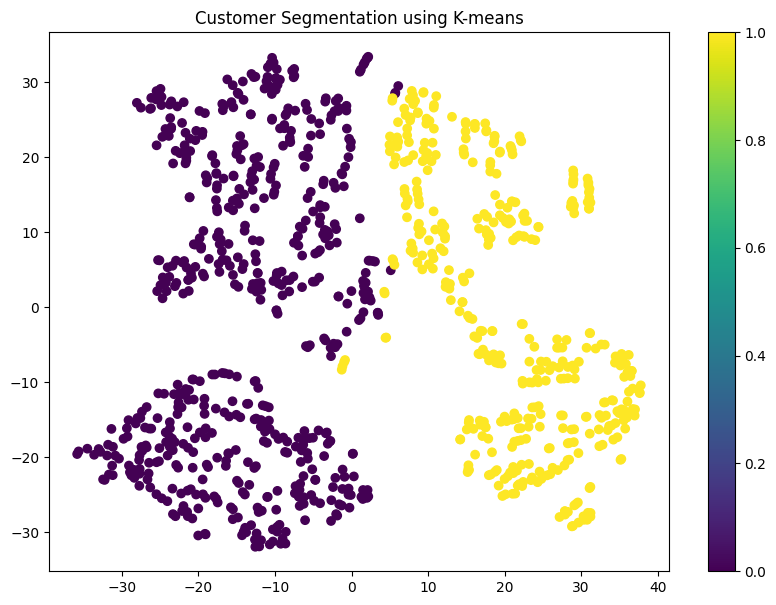

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('Customer Segmentation using K-means')
plt.show()

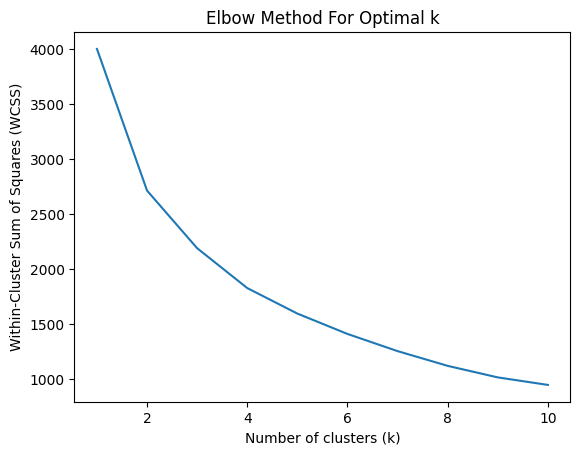

In [45]:
import matplotlib.pyplot as plt

# Initialize a list to hold the WCSS values for different numbers of clusters
wcss = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()